## Z-score

In [1]:
from perseuspy import pd
from perseuspy.parameters import *
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [2]:
%matplotlib inline

#### Importing Perseus quantile-normalized matrix

In [3]:
matrix_quantile_perseus = pd.read_perseus(r'C:\Users\denise\Sources\Repos\MSC_THESIS_PUBLIC\data\quantile_data\Matrix30_usa.txt')
matrix_quantile_perseus

Column Name,X99_control_NB_Plasma_Quant_C18_Pos_140,X98_control_NB_Plasma_Quant_C18_Pos_060,X97_control_NB_Plasma_Quant_C18_Pos_057,X96_control_NB_Plasma_Quant_C18_Pos_042,X95_control_NB_Plasma_Quant_C18_Pos_072,X94_control_NB_Plasma_Quant_C18_Pos_089,X93_control_NB_Plasma_Quant_C18_Pos_138,X92_control_NB_Plasma_Quant_C18_Pos_067,X91_control_NB_Plasma_Quant_C18_Pos_025,X90_control_NB_Plasma_Quant_C18_Pos_037,...,MSMS.count,PRECURSORMZ,PRECURSORTYPE,Ontology_,InChIKey,SMILES_,File.name.Accession,Total.score,Structure.rank.1,Databases
Group1,control,control,control,control,control,control,control,control,control,control,...,,,,,,,,,,
Gruppo_1,control,control,control,control,control,control,control,control,control,control,...,,,,,,,,,,
Gruppo_2,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,...,,,,,,,,,,
Classificazione,0_22_C18_POS,0_21_C18_POS,0_20_C18_POS,0_19_C18_POS,0_18_C18_POS,0_17_C18_POS,0_16_C18_POS,0_15_C18_POS,0_14_C18_POS,0_13_C18_POS,...,,,,,,,,,,
UPN_RINB,22,21,20,19,18,17,16,15,14,13,...,,,,,,,,,,
SEX,,,,,,,,,,,...,,,,,,,,,,
ETADG,,,,,,,,,,,...,,,,,,,,,,
STADIO_INSS,,,,,,,,,,,...,,,,,,,,,,
SEDETUM,,,,,,,,,,,...,,,,,,,,,,
CES,,,,,,,,,,,...,,,,,,,,,,


#### Retrieving samples

In [4]:
sample_quantile_perseus = matrix_quantile_perseus.filter(regex='_NB_Plasma_Quant_C18_Pos_')
sample_quantile_perseus = sample_quantile_perseus.round(decimals = 4) # Rounding here is forced to easily compare the results with Perseus's own results
sample_quantile_perseus

Column Name,X99_control_NB_Plasma_Quant_C18_Pos_140,X98_control_NB_Plasma_Quant_C18_Pos_060,X97_control_NB_Plasma_Quant_C18_Pos_057,X96_control_NB_Plasma_Quant_C18_Pos_042,X95_control_NB_Plasma_Quant_C18_Pos_072,X94_control_NB_Plasma_Quant_C18_Pos_089,X93_control_NB_Plasma_Quant_C18_Pos_138,X92_control_NB_Plasma_Quant_C18_Pos_067,X91_control_NB_Plasma_Quant_C18_Pos_025,X90_control_NB_Plasma_Quant_C18_Pos_037,...,X10_onset_NB_Plasma_Quant_C18_Pos_087,X09_onset_NB_Plasma_Quant_C18_Pos_055,X08_onset_NB_Plasma_Quant_C18_Pos_106,X07_onset_NB_Plasma_Quant_C18_Pos_114,X06_onset_NB_Plasma_Quant_C18_Pos_064,X05_onset_NB_Plasma_Quant_C18_Pos_141,X04_onset_NB_Plasma_Quant_C18_Pos_121,X03_onset_NB_Plasma_Quant_C18_Pos_069,X02_onset_NB_Plasma_Quant_C18_Pos_068,X01_onset_NB_Plasma_Quant_C18_Pos_070
Group1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_2,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,...,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A
Classificazione,0_22_C18_POS,0_21_C18_POS,0_20_C18_POS,0_19_C18_POS,0_18_C18_POS,0_17_C18_POS,0_16_C18_POS,0_15_C18_POS,0_14_C18_POS,0_13_C18_POS,...,2a_4615_C18_POS,2a_4645_C18_POS,2a_4634_C18_POS,2a_4624_C18_POS,2a_4622_C18_POS,2a_4620_C18_POS,2a_4382_C18_POS,2a_4223_C18_POS,2a_4379_C18_POS,2a_4292_C18_POS
UPN_RINB,22,21,20,19,18,17,16,15,14,13,...,4615,4645,4634,4624,4622,4620,4382,4223,4379,4292
SEX,,,,,,,,,,,...,1,0,0,0,0,0,1,0,0,0
ETADG,,,,,,,,,,,...,169,22,29,12,46,22,9,60,56,17
STADIO_INSS,,,,,,,,,,,...,1,1,1,1,1,1,0,1,1,1
SEDETUM,,,,,,,,,,,...,1,1,4,3,3,2,3,3,2,1
CES,,,,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


#### Subtract row mean from each element in row

In [5]:
sample_quantile_perseus_round_mean = sample_quantile_perseus.sub(sample_quantile_perseus.mean(axis = 1), axis = 0)
sample_quantile_perseus_round_mean

Column Name,X99_control_NB_Plasma_Quant_C18_Pos_140,X98_control_NB_Plasma_Quant_C18_Pos_060,X97_control_NB_Plasma_Quant_C18_Pos_057,X96_control_NB_Plasma_Quant_C18_Pos_042,X95_control_NB_Plasma_Quant_C18_Pos_072,X94_control_NB_Plasma_Quant_C18_Pos_089,X93_control_NB_Plasma_Quant_C18_Pos_138,X92_control_NB_Plasma_Quant_C18_Pos_067,X91_control_NB_Plasma_Quant_C18_Pos_025,X90_control_NB_Plasma_Quant_C18_Pos_037,...,X10_onset_NB_Plasma_Quant_C18_Pos_087,X09_onset_NB_Plasma_Quant_C18_Pos_055,X08_onset_NB_Plasma_Quant_C18_Pos_106,X07_onset_NB_Plasma_Quant_C18_Pos_114,X06_onset_NB_Plasma_Quant_C18_Pos_064,X05_onset_NB_Plasma_Quant_C18_Pos_141,X04_onset_NB_Plasma_Quant_C18_Pos_121,X03_onset_NB_Plasma_Quant_C18_Pos_069,X02_onset_NB_Plasma_Quant_C18_Pos_068,X01_onset_NB_Plasma_Quant_C18_Pos_070
Group1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_2,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,...,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A
Classificazione,0_22_C18_POS,0_21_C18_POS,0_20_C18_POS,0_19_C18_POS,0_18_C18_POS,0_17_C18_POS,0_16_C18_POS,0_15_C18_POS,0_14_C18_POS,0_13_C18_POS,...,2a_4615_C18_POS,2a_4645_C18_POS,2a_4634_C18_POS,2a_4624_C18_POS,2a_4622_C18_POS,2a_4620_C18_POS,2a_4382_C18_POS,2a_4223_C18_POS,2a_4379_C18_POS,2a_4292_C18_POS
UPN_RINB,22,21,20,19,18,17,16,15,14,13,...,4615,4645,4634,4624,4622,4620,4382,4223,4379,4292
SEX,,,,,,,,,,,...,1,0,0,0,0,0,1,0,0,0
ETADG,,,,,,,,,,,...,169,22,29,12,46,22,9,60,56,17
STADIO_INSS,,,,,,,,,,,...,1,1,1,1,1,1,0,1,1,1
SEDETUM,,,,,,,,,,,...,1,1,4,3,3,2,3,3,2,1
CES,,,,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


#### Getting Z-score from Perseus

In [6]:
matrix_zscore_perseus = pd.read_perseus(r'C:\Users\denise\Sources\Repos\MSC_THESIS_PUBLIC\data\quantile_data\z-score_usa.txt')
sample_zscore_perseus = matrix_zscore_perseus.filter(regex='_NB_Plasma_Quant_C18_Pos_')
sample_zscore_perseus #perseus matrix 31 z-score

Column Name,X99_control_NB_Plasma_Quant_C18_Pos_140,X98_control_NB_Plasma_Quant_C18_Pos_060,X97_control_NB_Plasma_Quant_C18_Pos_057,X96_control_NB_Plasma_Quant_C18_Pos_042,X95_control_NB_Plasma_Quant_C18_Pos_072,X94_control_NB_Plasma_Quant_C18_Pos_089,X93_control_NB_Plasma_Quant_C18_Pos_138,X92_control_NB_Plasma_Quant_C18_Pos_067,X91_control_NB_Plasma_Quant_C18_Pos_025,X90_control_NB_Plasma_Quant_C18_Pos_037,...,X10_onset_NB_Plasma_Quant_C18_Pos_087,X09_onset_NB_Plasma_Quant_C18_Pos_055,X08_onset_NB_Plasma_Quant_C18_Pos_106,X07_onset_NB_Plasma_Quant_C18_Pos_114,X06_onset_NB_Plasma_Quant_C18_Pos_064,X05_onset_NB_Plasma_Quant_C18_Pos_141,X04_onset_NB_Plasma_Quant_C18_Pos_121,X03_onset_NB_Plasma_Quant_C18_Pos_069,X02_onset_NB_Plasma_Quant_C18_Pos_068,X01_onset_NB_Plasma_Quant_C18_Pos_070
Group1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_2,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,...,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A
Classificazione,0_22_C18_POS,0_21_C18_POS,0_20_C18_POS,0_19_C18_POS,0_18_C18_POS,0_17_C18_POS,0_16_C18_POS,0_15_C18_POS,0_14_C18_POS,0_13_C18_POS,...,2a_4615_C18_POS,2a_4645_C18_POS,2a_4634_C18_POS,2a_4624_C18_POS,2a_4622_C18_POS,2a_4620_C18_POS,2a_4382_C18_POS,2a_4223_C18_POS,2a_4379_C18_POS,2a_4292_C18_POS
UPN_RINB,22,21,20,19,18,17,16,15,14,13,...,4615,4645,4634,4624,4622,4620,4382,4223,4379,4292
SEX,,,,,,,,,,,...,1,0,0,0,0,0,1,0,0,0
ETADG,,,,,,,,,,,...,169,22,29,12,46,22,9,60,56,17
STADIO_INSS,,,,,,,,,,,...,1,1,1,1,1,1,0,1,1,1
SEDETUM,,,,,,,,,,,...,1,1,4,3,3,2,3,3,2,1
CES,,,,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


#### Calculating Z-score (along the rows)

In [7]:
standard_scaler = StandardScaler()
X_t = sample_quantile_perseus_round_mean.T 
X_t_scaled = standard_scaler.fit_transform(X_t)
sample_zscore_custom = pd.DataFrame(data=X_t_scaled.T, columns = sample_zscore_perseus.columns, index = sample_zscore_perseus.index)
sample_zscore_custom

Column Name,X99_control_NB_Plasma_Quant_C18_Pos_140,X98_control_NB_Plasma_Quant_C18_Pos_060,X97_control_NB_Plasma_Quant_C18_Pos_057,X96_control_NB_Plasma_Quant_C18_Pos_042,X95_control_NB_Plasma_Quant_C18_Pos_072,X94_control_NB_Plasma_Quant_C18_Pos_089,X93_control_NB_Plasma_Quant_C18_Pos_138,X92_control_NB_Plasma_Quant_C18_Pos_067,X91_control_NB_Plasma_Quant_C18_Pos_025,X90_control_NB_Plasma_Quant_C18_Pos_037,...,X10_onset_NB_Plasma_Quant_C18_Pos_087,X09_onset_NB_Plasma_Quant_C18_Pos_055,X08_onset_NB_Plasma_Quant_C18_Pos_106,X07_onset_NB_Plasma_Quant_C18_Pos_114,X06_onset_NB_Plasma_Quant_C18_Pos_064,X05_onset_NB_Plasma_Quant_C18_Pos_141,X04_onset_NB_Plasma_Quant_C18_Pos_121,X03_onset_NB_Plasma_Quant_C18_Pos_069,X02_onset_NB_Plasma_Quant_C18_Pos_068,X01_onset_NB_Plasma_Quant_C18_Pos_070
Group1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_1,control,control,control,control,control,control,control,control,control,control,...,onset,onset,onset,onset,onset,onset,onset,onset,onset,onset
Gruppo_2,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,CTR,...,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A,1_2A
Classificazione,0_22_C18_POS,0_21_C18_POS,0_20_C18_POS,0_19_C18_POS,0_18_C18_POS,0_17_C18_POS,0_16_C18_POS,0_15_C18_POS,0_14_C18_POS,0_13_C18_POS,...,2a_4615_C18_POS,2a_4645_C18_POS,2a_4634_C18_POS,2a_4624_C18_POS,2a_4622_C18_POS,2a_4620_C18_POS,2a_4382_C18_POS,2a_4223_C18_POS,2a_4379_C18_POS,2a_4292_C18_POS
UPN_RINB,22,21,20,19,18,17,16,15,14,13,...,4615,4645,4634,4624,4622,4620,4382,4223,4379,4292
SEX,,,,,,,,,,,...,1,0,0,0,0,0,1,0,0,0
ETADG,,,,,,,,,,,...,169,22,29,12,46,22,9,60,56,17
STADIO_INSS,,,,,,,,,,,...,1,1,1,1,1,1,0,1,1,1
SEDETUM,,,,,,,,,,,...,1,1,4,3,3,2,3,3,2,1
CES,,,,,,,,,,,...,0,0,0,0,0,0,0,0,0,0


#### Checking differences between out Z-score results and Perseus' results

In [26]:
zscore_difference =  sample_zscore_custom.values -sample_zscore_perseus.values 
zscore_difference = pd.DataFrame(zscore_difference)
zscore_difference

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,-0.008421,-0.009779,-0.012086,-0.010034,-0.010257,-0.009779,-0.010888,-0.008840,-0.010136,-0.006311,...,0.003921,0.000889,0.002853,0.002597,0.003631,0.003054,0.004236,0.007560,0.004639,0.003921
1,-0.009132,-0.009374,-0.011148,-0.008786,-0.010569,-0.011297,-0.010269,-0.007498,-0.010722,-0.006716,...,0.004447,0.000867,0.001926,0.002428,0.003079,0.003079,0.004447,0.006966,0.005244,0.005244
2,-0.000228,-0.002723,-0.007333,-0.007629,-0.009316,-0.007629,0.000125,-0.004571,-0.009533,-0.007629,...,-0.003390,-0.003289,0.000486,-0.001294,-0.002514,0.001336,-0.003717,0.012351,-0.002723,0.013167
3,-0.005981,-0.009444,-0.008575,-0.007133,-0.009103,-0.009895,-0.009680,-0.008857,-0.007211,-0.007087,...,0.005756,0.006619,0.002847,0.006771,0.005289,0.006152,0.004472,-0.009444,0.005215,0.004992
4,-0.006957,-0.009297,-0.012557,-0.008244,-0.010956,-0.009297,-0.014324,-0.006030,-0.010104,-0.005278,...,0.003722,0.002447,0.003376,0.002184,0.003722,0.003031,0.005057,0.008008,0.003722,0.003722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,-0.011896,-0.008393,-0.007116,-0.009249,-0.008047,-0.007682,-0.008104,-0.010860,-0.009987,-0.009764,...,0.006307,0.007618,0.003733,0.007259,0.005125,0.000776,0.004409,-0.006985,0.005767,0.004312
343,0.003252,0.004788,0.030914,0.018321,0.007110,-0.004410,0.000647,-0.010002,0.004668,0.002967,...,-0.004324,-0.004998,0.001315,-0.000998,-0.001999,-0.001443,-0.002712,-0.003952,-0.001677,-0.005848
344,0.010728,0.002602,-0.000162,0.005720,0.006595,0.006048,-0.001101,0.004486,0.006595,0.006814,...,-0.001198,-0.013243,-0.003193,-0.006663,-0.009216,-0.009785,0.003709,-0.007312,-0.000428,-0.003621
345,0.011684,-0.000883,-0.002006,0.002262,0.004803,0.008210,-0.003072,0.006762,0.012808,0.009307,...,0.000637,-0.014553,-0.007147,-0.006380,-0.005305,-0.010280,-0.001280,0.001014,-0.000309,-0.002849


#### Plotting distribution of the difference

C:\Users\denise\opt\miniconda3\envs\msc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

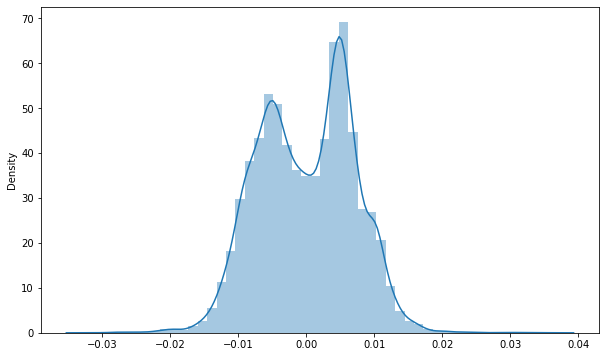

In [27]:
plt.figure(figsize=(10, 6))
sn.distplot(zscore_difference, kde=True) 

#### Getting outliers (if present)

In [37]:
diff = numpy.where(differ <-0.03) # outliers
diff

(array([205, 299], dtype=int64), array([69, 50], dtype=int64))

#### Merging our Z-score results with the original Perseus matrix

In [ ]:
matrix_zscore_custom = matrix_quantile_perseus.copy()

i = 0
for col in matrix_zscore_custom.columns:
	matrix_zscore_custom[col] = sample_zscore_custom.iloc[:,i]
	i = i + 1

#### Exporting the matrix back to Perseus

In [ ]:
matrix_zscore_custom.to_perseus(r'C:\Users\denise\Sources\Repos\MSC_THESIS_PUBLIC\data\quantile_data\my_zscore_matrix.txt')